In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

from matplotlib.colors import ListedColormap

C:\Users\dolin\AppData\Local\Temp\ipykernel_30996\2631467103.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv('drag_curves.csv')

data.fillna(0.0)

,v1,d1,v2,d2,v3,d3,v4,d4,v5,d5
0,4803.81724,44.75804,4673.117400,26.71360,4809.320328,26.75697,785.216616,14.83155,7492.054104,0.39096
1,4786.18855,44.62806,4668.990408,26.93043,4788.682320,26.80033,805.851576,14.83155,7471.419144,0.39096
2,4768.55986,44.45475,4689.628416,26.97379,4768.047360,26.75697,826.489584,14.87492,7450.781136,0.47769
3,4750.93117,44.54140,4710.263376,26.93043,4747.409352,26.75697,847.124544,14.91828,7430.146176,0.56442
4,4733.30249,44.67139,4730.901384,26.93043,4726.774392,26.80033,867.762552,15.00501,7409.508168,0.60779
...,...,...,...,...,...,...,...,...,...,...
503,7430.49161,16.46515,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000
504,7417.27010,16.63846,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000
505,7399.64141,16.81177,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000
506,7382.01272,16.98508,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000


(8000.0, 750.0)

(0.0, 46.0)

Text(0.5, 1.0, 'Drag-Velocity profiles')

Text(0.5, 0, 'Velocity (m/s)')

Text(0, 0.5, 'Drag')

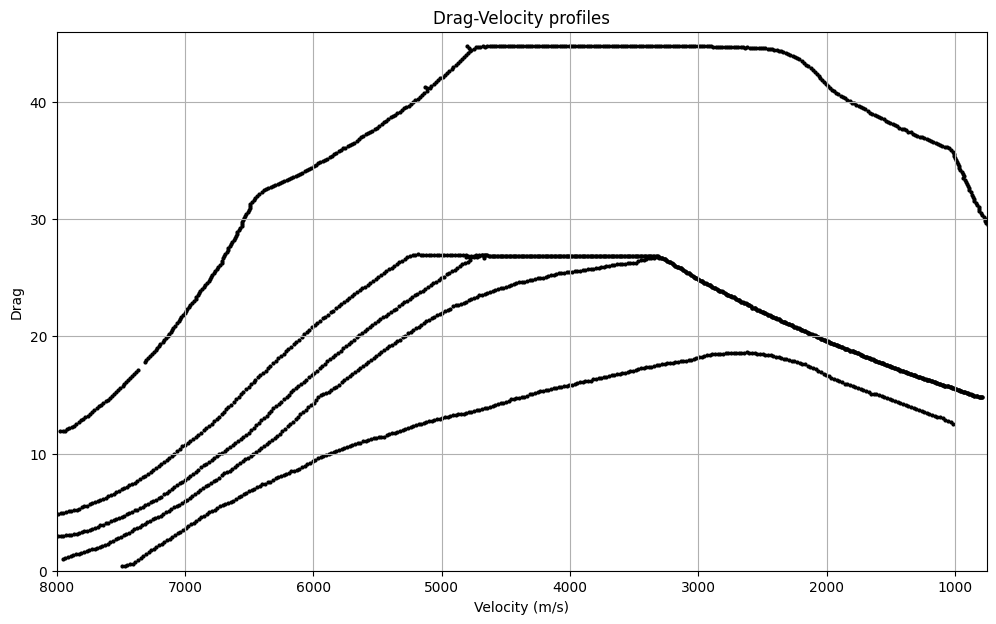

In [4]:
v_columns = [col for col in data.columns if col.startswith('v')]
d_columns = [col for col in data.columns if col.startswith('d')]



fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

plt_ = ax

plt_.invert_xaxis()


plt1 = plt_.scatter(
    np.nan_to_num(data['v1'].to_numpy(), nan = 0),
    np.nan_to_num(data['d1'].to_numpy(), nan = 0),
    c='k',
    s=4
)
plt1 = plt_.scatter(
    np.nan_to_num(data['v5'].to_numpy(), nan = 0),
    np.nan_to_num(data['d5'].to_numpy(), nan = 0),
    c='k',
    s=4
)

plt1 = plt_.scatter(
    np.nan_to_num(data['v4'].to_numpy(), nan = 0),
    np.nan_to_num(data['d4'].to_numpy(), nan = 0),
    c='k',
    s=4
)
plt1 = plt_.scatter(
    np.nan_to_num(data['v2'].to_numpy(), nan = 0),
    np.nan_to_num(data['d2'].to_numpy(), nan = 0),
    c='k',
    s=4
)
plt1 = plt_.scatter(
    np.nan_to_num(data['v3'].to_numpy(), nan = 0),
    np.nan_to_num(data['d3'].to_numpy(), nan = 0),
    c='k',
    s=4
)
    
plt_.grid()
plt.xlim([8000, 750])
plt.ylim([0, 46])
plt.title("Drag-Velocity profiles")
plt.xlabel('Velocity (m/s)')
plt.ylabel('Drag')
    
#img = plt.imread("drag.png")
#plt_.imshow(img, aspect='auto', extent=[7620, 0, 0, 60], alpha=1, cmap='Greys_r')

In [5]:

def traj_disp_new(n, data):
    if n==1:
        
        r_speed = (5181, 7925)
        drag_datums = [6, 8, 10, 15, 20, 25, 30]

    elif n==2:
        r_speed = (4267, 5181)
        drag_datums = [15, 25, 35, 45]

    elif n==3:
        r_speed = (3200, 4267)
        drag_datums = [15, 25, 35, 45]

    elif n==4:
        r_speed = (1890, 3200)
        drag_datums = [20, 30, 40]

    elif n==5:
        r_speed = (760, 1890)
        drag_datums = [10, 20, 30]
        

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

    plt_ = ax
    
    
    for v_col, d_col in zip(v_columns, d_columns):
        
        disp_data = data[(data[v_col].between(*r_speed))][[v_col, d_col]]
        
        v_array = disp_data[v_col].to_numpy()
        d_array = disp_data[d_col].to_numpy()

        traj_x = np.array([traj_x_convert_new(n, v, d) for v, d in zip(v_array, d_array)])
        traj_y = np.array([traj_y_convert_new(n, v) for v in v_array])
        
        plt1 = plt_.scatter(traj_x, traj_y, s=10)

    drag_v = np.linspace(r_speed[0], r_speed[1], 200)
    
    for dval in drag_datums:
        drag_l_x = np.array([traj_x_convert_new(n, drag_v, dval) for v, d in zip(v_array, d_array)])
        drag_l_y = np.array([traj_y_convert_new(n, drag_v) for v in v_array])
        plt1 = plt_.scatter(drag_l_x, drag_l_y, s=1, c='k')

    major_ticks = np.arange(0, 500, 25)
    
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    # And a corresponding grid
    ax.grid(which='both')
    
    plt_.set_xlim([0, 500])
    plt_.set_ylim([50, 350])
    
    
        
def traj_x_convert_new(n, vel, drag):
    
    if n==1:
        return 1269.3735913802313 + -0.08206361592134565 * vel**1 * drag**0 + -153.9799520644858 * vel**0 * drag**1 + -3.1466697000533627e-06 * vel**2 * drag**0 + 0.01314221307938963 * vel**1 * drag**1 + 4.662789044310247 * vel**0 * drag**2 + 7.728348100366489e-10 * vel**3 * drag**0 + -4.161746084256363e-07 * vel**2 * drag**1 + -0.00015695195109508781 * vel**1 * drag**2 + -0.052420876333425334 * vel**0 * drag**3
    elif n==2:
        return -119.27311679936585 + 0.1310360825751968 * vel**1 * drag**0 + -14.509634466688668 * vel**0 * drag**1 + -4.508956766569039e-07 * vel**2 * drag**0 + 0.0014529141150055665 * vel**1 * drag**1 + -0.004804810480900542 * vel**0 * drag**2
    elif n==3:
        return -169.89669862960386 + 0.19623953463938421 * vel**1 * drag**0 + -13.736386540438081 * vel**0 * drag**1 + -4.726735117477343e-07 * vel**2 * drag**0 + 0.00040459906559150603 * vel**1 * drag**1 + 0.07268485357148893 * vel**0 * drag**2
    elif n==4:
        return -734.5494910944298 + 0.9290782496000264 * vel**1 * drag**0 + -29.37866043040794 * vel**0 * drag**1 + -0.0001350962705991554 * vel**2 * drag**0 + 0.00109521485502761 * vel**1 * drag**1 + 0.31166666666704274 * vel**0 * drag**2
    elif n==5:
        return -365.6282303867932 + 1.0003973495016918 * vel**1 * drag**0 + -15.409853981961241 * vel**0 * drag**1 + -0.00024196873768544958 * vel**2 * drag**0 + -0.0016156332438259542 * vel**1 * drag**1 + 0.24249999999981453 * vel**0 * drag**2
        
            
def traj_y_convert_new(n, vel):

    if n==1:
        out = (0.00036443148 * vel - 1.88811953353)
    elif n==2:
        out = (0.0010940919 * vel - 4.66849015317)
    elif n==3:
        out = (0.00093720712 * vel - 2.99906279288)
    elif n==4:
        out = (0.00076335877 * vel - 1.4427480916)
    elif n==5:
        out = (0.00088495575 * vel - 0.67256637168)

    return  59.5 + 280.2 * out
    
#traj_bounds= [[0, 500], [50, 350]]

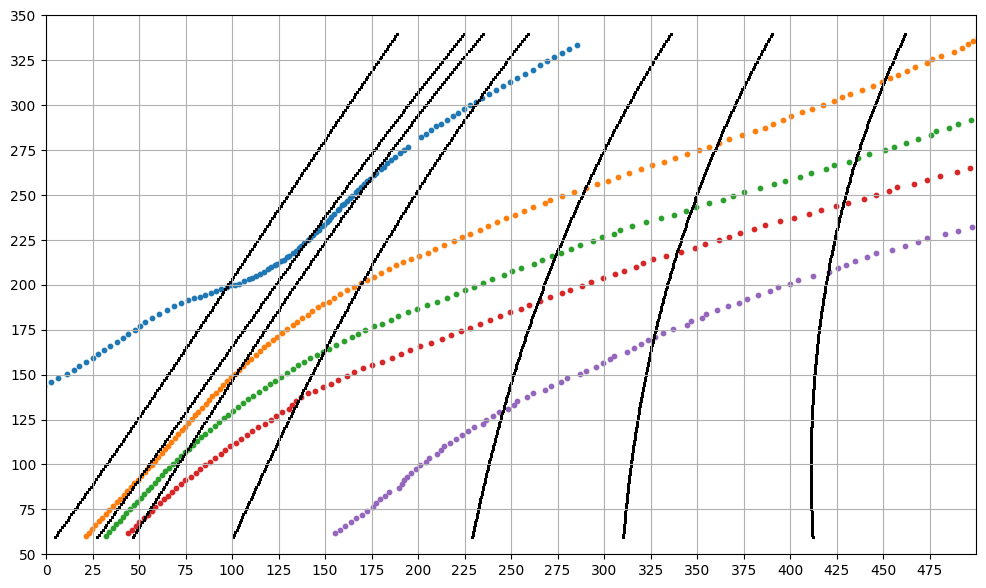

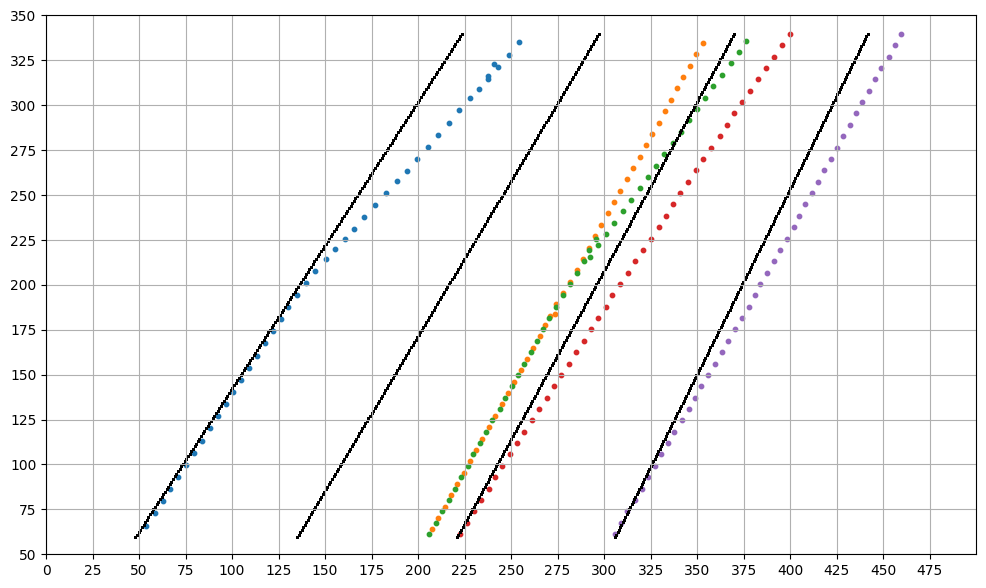

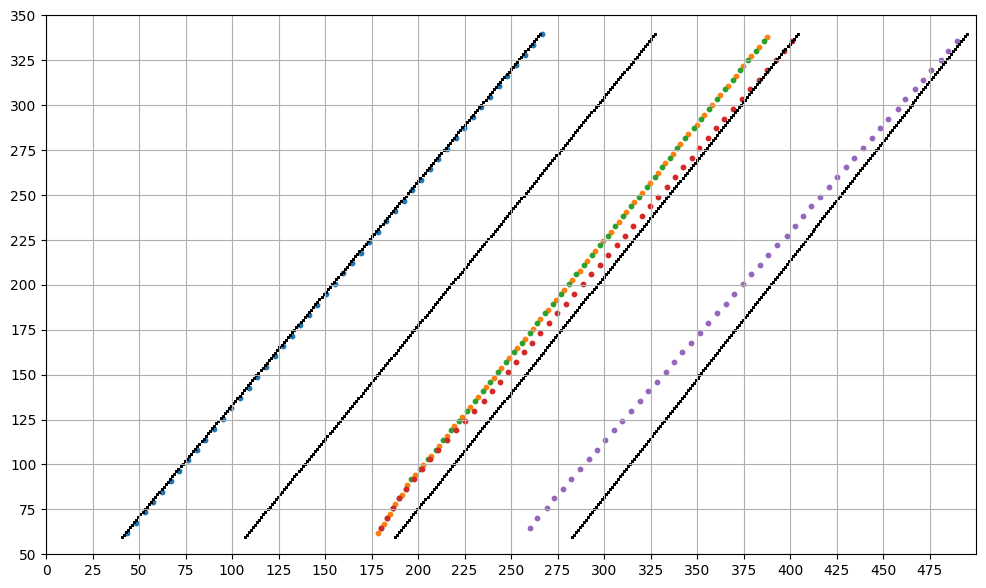

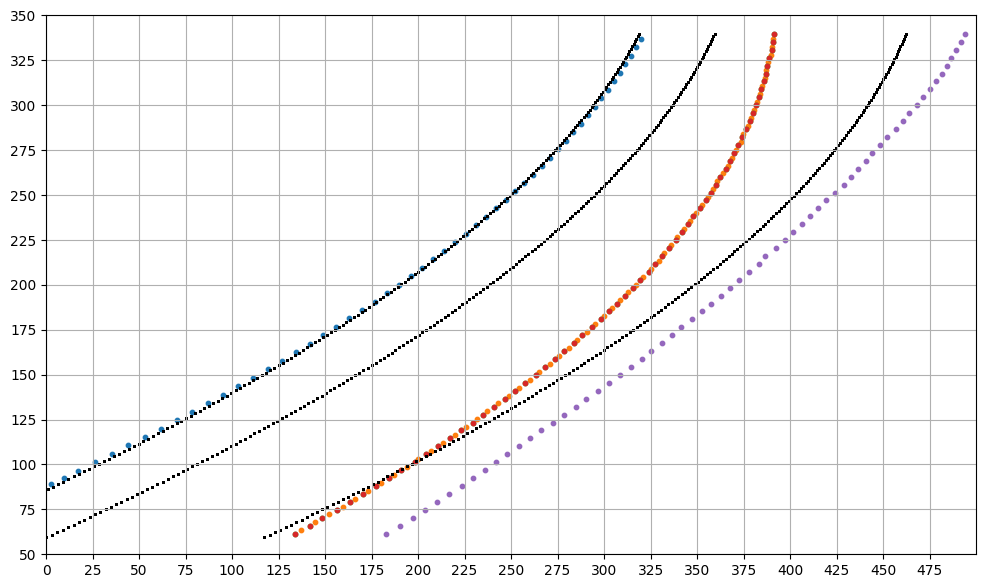

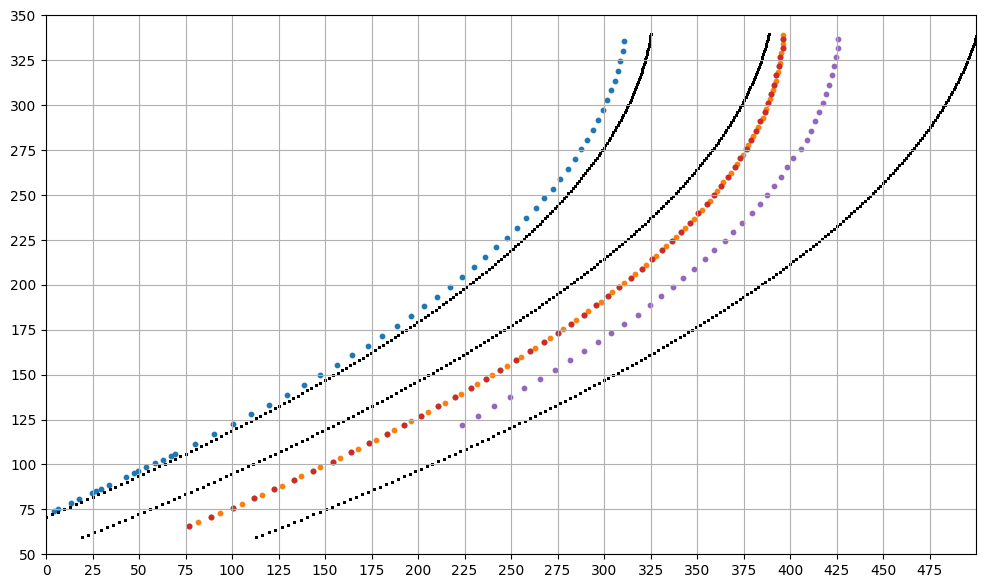

In [6]:
traj_disp_new(1, data)
traj_disp_new(2, data)
traj_disp_new(3, data)
traj_disp_new(4, data)
traj_disp_new(5, data)